# Unsupervised Learning Techniques
The vast majority of the available data is actually unlabeled

## Clustering
Clustering is the task of identifying similar instances and assigning them to clusters, i.e., groups of similar instances, Just like in classification, each instance gets assigned to a group.

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

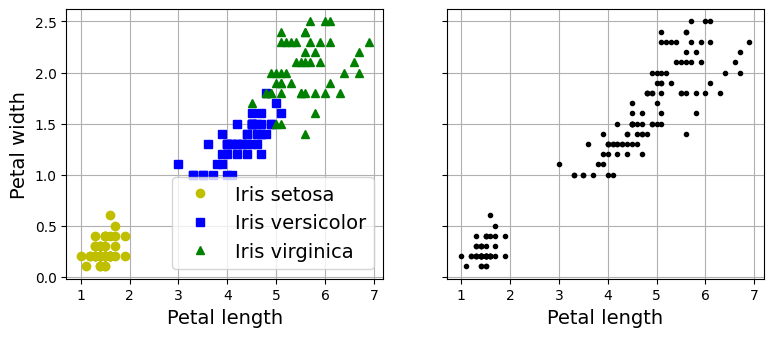

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

### K-Means
K-Means is an unsupervised clustering algorithm that groups a data set into K groups (clusters), assigning each point to the cluster with the closest centroid, with the goal of minimizing internal variation within each group.

In [32]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.81],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

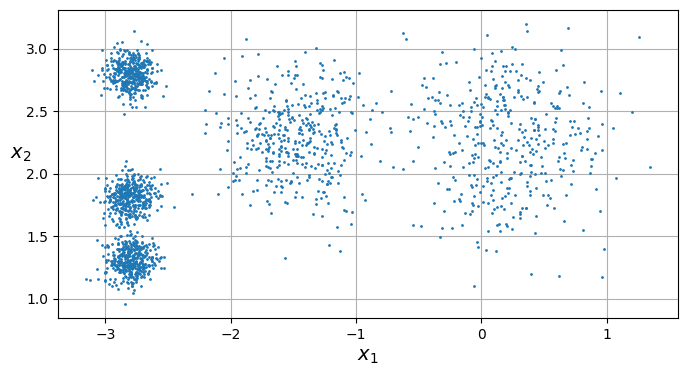

In [33]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

Each instance was assigned to one of the 5 clusters. In the context of clustering, an instance’s label is the index of the cluster that this instance gets assigned to by the algorithm: this is not to be confused with the class labels in classification

In [34]:
y_pred

array([4, 2, 1, ..., 3, 1, 2], dtype=int32)

In [35]:
y_pred is kmeans.labels_

True

In [36]:
kmeans.cluster_centers_

array([[-1.46679593,  2.28585348],
       [ 0.20876306,  2.25551336],
       [-2.80389616,  1.81108049],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30087566]])

In [37]:
kmeans.labels_

array([4, 2, 1, ..., 3, 1, 2], dtype=int32)

In [38]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

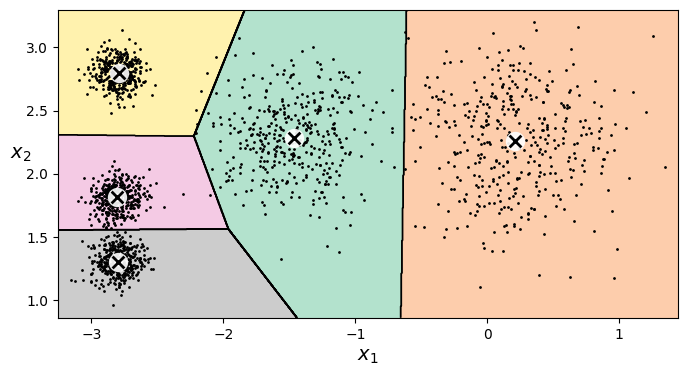

In [39]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

The vast majority of the instances were clearly assigned to the appropriate cluster, but a few instances were probably mislabeled (especially near the boundary between the top left cluster and the central cluster). Indeed, the K-Means algorithm does not behave very well when the blobs have very different diameters since all it cares about when assigning an instance to a cluster is the 
distance to the centroid

#### Hard Clustering vs Soft Clustering

Instead of assigning each instance to a single cluster, which is called hard clustering, it can be useful to just give each instance a score per cluster: this is called so clustering.
For example, the score can be the distance between the instance and the centroid, or conversely it can be a similarity score

In [40]:
kmeans.transform(X_new).round(2)

array([[1.49, 0.33, 2.81, 2.9 , 2.89],
       [4.48, 2.8 , 5.81, 5.85, 5.84],
       [1.69, 3.29, 1.2 , 0.29, 1.71],
       [1.55, 3.22, 0.72, 0.36, 1.22]])

#### The K-Means Algorithm
How does K-Means work?
1. **Initialization:**
K centroids (center points) are randomly chosen.

2. **Assignment:**
Each data point is assigned to the nearest centroid, forming K groups (clusters).

3. **Update:**
The position of each centroid is recalculated as the average of all the points assigned to its cluster.

4. **Repetition:**
Steps 2 and 3 are repeated until the centroids no longer change (or change very little), i.e., the algorithm converges.

Unfortunately, although the algorithm is guaranteed to converge, it may not converge to the right solution (i.e., it may converge to a local optimum): this depends on the centroid initialization.

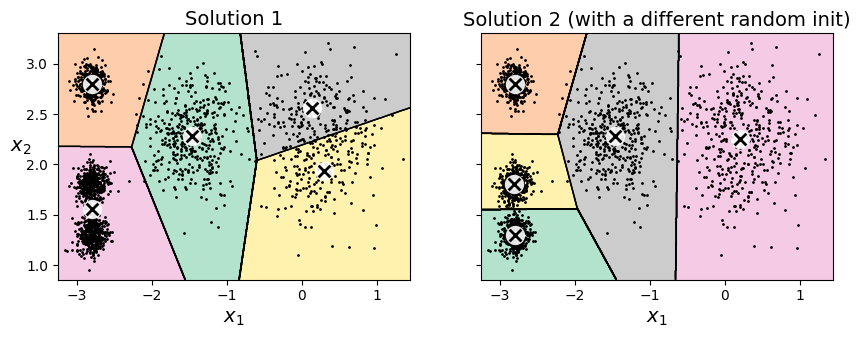

In [43]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=9)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1",
                          "Solution 2 (with a different random init)")
plt.show()